In [16]:
# Вариант 1 Выборка
data = [
    135, 133, 124, 132, 104, 152, 134, 130, 129, 120, 122, 124,
    117, 123, 123, 129, 121, 122, 125, 131, 147, 124, 137, 112,
    126, 128, 111, 129, 115, 147, 131, 132, 137, 119, 125, 120,
    129, 125, 123, 127, 132, 118, 133, 132, 132, 134, 131, 120,
    135, 132, 125, 132, 108, 114, 121, 133, 133, 135, 131, 125,
    114, 115, 122, 131, 125, 132, 120, 126, 115, 117, 118, 118,
    132, 134, 127, 127, 124, 135, 128, 127, 115, 144, 129, 120,
    137, 127, 125, 116, 132, 120, 117, 127, 118, 109, 127, 122,
    120, 135, 116, 118, 133, 136, 125, 126, 119, 126, 129, 127,
    129, 124, 127, 132, 126, 131, 127, 130, 126, 124, 135, 127,
    124, 123, 123, 130, 132, 143, 122, 139, 120, 134, 108, 132,
    121, 111, 123, 140, 137, 120, 125, 131, 118, 120, 120, 136,
    129, 127, 116, 138, 128, 133, 122, 131, 128, 140, 138, 134,
    120, 126, 109, 137, 111, 115, 117, 130, 113, 126, 115, 124,
    125, 118, 115, 128, 123, 129, 128, 120, 115, 134, 118, 135,
    134
]

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

# 1.Составить вариационный ряд

Вариационный ряд — это упорядоченный набор данных, полученных в результате наблюдений или экспериментов. Он представляет собой последовательность значений, расположенных в порядке возрастания (или убывания).

In [18]:
sorted_data = sorted(data)

print(*np.array(sorted_data).T)

104 108 108 109 109 111 111 111 112 113 114 114 115 115 115 115 115 115 115 115 116 116 116 117 117 117 117 118 118 118 118 118 118 118 118 119 119 120 120 120 120 120 120 120 120 120 120 120 120 120 121 121 121 122 122 122 122 122 122 123 123 123 123 123 123 123 124 124 124 124 124 124 124 124 125 125 125 125 125 125 125 125 125 125 126 126 126 126 126 126 126 126 127 127 127 127 127 127 127 127 127 127 127 127 128 128 128 128 128 128 129 129 129 129 129 129 129 129 129 130 130 130 130 131 131 131 131 131 131 131 131 132 132 132 132 132 132 132 132 132 132 132 132 132 133 133 133 133 133 133 134 134 134 134 134 134 134 135 135 135 135 135 135 135 136 136 137 137 137 137 137 138 138 139 140 140 143 144 147 147 152


In [19]:
# 2. Создаем DataFrame с подсчетом частоты каждого уникального значения
df = pd.DataFrame(sorted_data, columns=['Значение'])

# 3. Подсчитываем частоту значений
df.value_counts().sort_index()

Значение
104          1
108          2
109          2
111          3
112          1
113          1
114          2
115          8
116          3
117          4
118          8
119          2
120         13
121          3
122          6
123          7
124          8
125         10
126          8
127         12
128          6
129          9
130          4
131          8
132         13
133          6
134          7
135          7
136          2
137          5
138          2
139          1
140          2
143          1
144          1
147          2
152          1
Name: count, dtype: int64

# 2. Составить интервальный статистический ряд

### Порядок выполнения:

1. **Определение числа интервалов (k):**
   Используется формула Стерджеса:
   k = 1 + 3.322 * log10(n)
   где n — объём выборки.

2. **Расчёт ширины интервала (h):**
   h = (X_max - X_min) / k
   где X_max и X_min — максимальное и минимальное значения.

3. **Формирование интервалов:**
   Деление диапазона от X_min до X_max с шагом h.

4. **Подсчёт частот:**
   Определить, сколько элементов выборки попадает в каждый интервал.


In [20]:
# Определение диапазона данных
min_val = min(data)
max_val = max(data)

# Вычисление количества интервалов (используем правило Стерджесса)
n = len(data)
k = int(np.ceil(1 + 3.322 * np.log10(n)))  # Количество интервалов
interval_width = (max_val - min_val) / k  # Ширина интервала

# Создаем интервалы
bins = np.arange(min_val, max_val + interval_width, interval_width)

# Подсчитываем частоты значений в каждом интервале
frequency, bin_edges = np.histogram(data, bins=bins)

# Строим DataFrame с интервалами и частотами
intervals = [f"{round(bin_edges[i], 2)}–{round(bin_edges[i+1], 2)}" for i in range(len(bin_edges)-1)]
interval_df = pd.DataFrame({
    'Интервал': intervals,
    'Частота': frequency
})

# Выводим интервальный статистический ряд
interval_df

,Интервал,Частота
0,104.0–109.33,5
1,109.33–114.67,7
2,114.67–120.0,25
3,120.0–125.33,47
4,125.33–130.67,39
5,130.67–136.0,41
6,136.0–141.33,12
7,141.33–146.67,2
8,146.67–152.0,2
9,152.0–157.33,1


# 3. По сгруппированным данным построить полигон относительных частот и гистограмму относительных частот

### Порядок выполнения:

1. **Построение полигона относительных частот:**
   Для каждого интервала вычисляется относительная частота, которая равна отношению частоты интервала к общему числу элементов выборки.
   Далее строится полигон, соединяя точки, координаты которых — середины интервалов и соответствующие им относительные частоты.

2. **Построение гистограммы относительных частот:**
   Для каждого интервала строится прямоугольник, высота которого равна относительной частоте интервала.
   Гистограмма отображает распределение данных по интервалам.


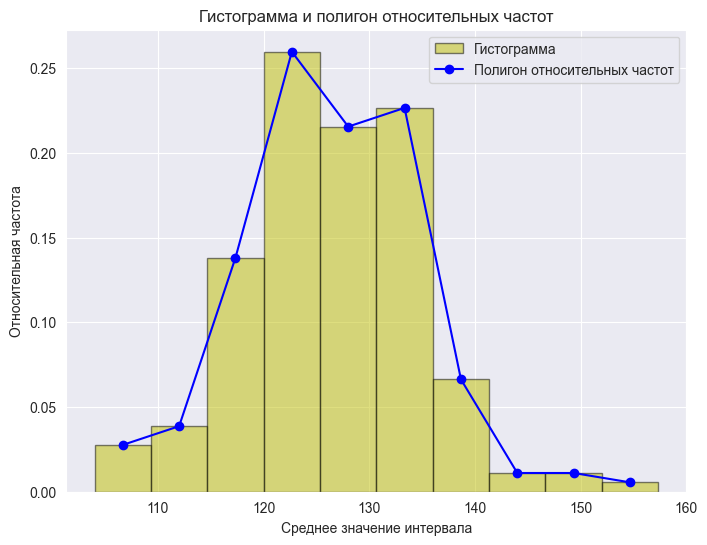

In [21]:
# Вычисляем относительные частоты
relative_frequencies = frequency / n

# Находим средние значения интервалов
midpoints = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]

# Строим график
plt.figure(figsize=(8, 6))

# Строим гистограмму относительных частот
plt.hist(midpoints, bins=bins, weights=relative_frequencies, alpha=0.5, color='y', edgecolor='black', label='Гистограмма')

# Строим полигон относительных частот
plt.plot(midpoints, relative_frequencies, marker='o', linestyle='-', color='b', label='Полигон относительных частот')

# Оформляем график
plt.title('Гистограмма и полигон относительных частот')
plt.xlabel('Среднее значение интервала')
plt.ylabel('Относительная частота')
plt.grid(True)
plt.legend()

# Показываем график
plt.show()

# 4. Построить график эмпирической функции распределения

### Порядок выполнения:

1. **Построение эмпирической функции распределения:**
   Эмпирическая функция распределения (ЭФР) показывает, какую долю всех наблюдений занимает значение, меньшее или равное заданному.
   Для каждого значения выборки определяется, какая часть всех данных меньше или равна этому значению, и строится график, где по оси X откладываются значения выборки, а по оси Y — соответствующие эмпирические вероятности (доли).


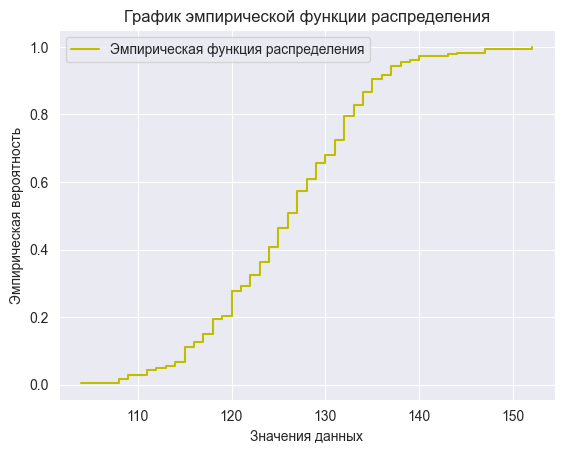

In [22]:
# Рассчитываем эмпирическую функцию распределения
n = len(sorted_data)
ecdf_values = np.arange(1, n+1) / n  # Эмпирическая частота накопления

# Строим график ЭФР
plt.step(sorted_data, ecdf_values, where='post', color='y', label='Эмпирическая функция распределения')

# Оформляем график
plt.title('График эмпирической функции распределения')
plt.xlabel('Значения данных')
plt.ylabel('Эмпирическая вероятность')
plt.grid(True)
plt.legend()

# Показываем график
plt.show()

In [23]:
data_ep = {
    'Значения данных': sorted_data,
    'Эмпирическая вероятность': ecdf_values
}

df_ep = pd.DataFrame(data_ep)

df_ep

,Значения данных,Эмпирическая вероятность
0,104,0.005525
1,108,0.011050
2,108,0.016575
3,109,0.022099
4,109,0.027624
...,...,...
176,143,0.977901
177,144,0.983425
178,147,0.988950
179,147,0.994475


# 5. Найти числовые характеристики выборки: выборочное среднее, исправленную выборочную дисперсию, моду, медиану, эксцесс, асимметрию. 

Числовые характеристики выборки позволяют описать ее основные свойства:

* Выборочное среднее — среднее арифметическое всех значений выборки.
* Исправленная выборочная дисперсия — мера разброса значений относительно выборочного среднего, учитывающая поправку на число наблюдений.
* Мода — значение, которое встречается наиболее часто.
* Медиана — значение, делящее выборку на две равные части.
* Эксцесс — мера "плоскости" распределения по сравнению с нормальным.
* Асимметрия — мера симметричности распределения относительно среднего.

In [24]:
import scipy.stats as stats


# Выборочное среднее
mean = np.mean(data)

# Исправленная выборочная дисперсия (используется ddof=1 для корректности)
variance = np.var(data, ddof=1)

# Мода (используем scipy для нахождения моды)
mode = stats.mode(data)  # Исправлено: доступ к атрибуту mode объекта

# Медиана
median = np.median(data)

# Эксцесс (эксцесс порядковой функции распределения, приближенно для выборки)
kurtosis = stats.kurtosis(data)

# Асимметрия (скос выборки)
skewness = stats.skew(data)

# Вывод всех характеристик
print(f"Выборочное среднее: {mean}")
print(f"Исправленная выборочная дисперсия: {variance}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Эксцесс: {kurtosis}")
print(f"Асимметрия: {skewness}")


Выборочное среднее: 126.02762430939227
Исправленная выборочная дисперсия: 66.48256599140578
Мода: ModeResult(mode=np.int64(120), count=np.int64(13))
Медиана: 126.0
Эксцесс: 0.14727608214021837
Асимметрия: 0.05059671083949057


# 6. По виду гистограммы и эмпирической функции распределения выборки выдвинуть гипотезу о распределении генеральной совокупности. 

Гипотеза: распределение наиболее близко к нормальному распределению, предположение основано на виде эмпирической функции и гистограммы распределения.

Гистограмма данных имеет форму, напоминающую колоколообразную кривую, что является характерным для нормального распределения.

Эмпирическая функция распределения показывает плавный рост, что также поддерживает предположение о нормальности данных.

Также схожесть с нормальным распределением показывает близкое к 0 ассиметрия.

# 7. Найти оценки параметров предполагаемого распределения генеральной совокупности. 

In [25]:
import scipy.stats as stats


# Выборочное среднее
mean = np.mean(data)

# Исправленная выборочная дисперсия (используется ddof=1 для корректности)
variance = np.var(data, ddof=1)

# Мода (используем scipy для нахождения моды)
mode = stats.mode(data)  # Исправлено: доступ к атрибуту mode объекта

# Медиана
median = np.median(data)

# Эксцесс (эксцесс порядковой функции распределения, приближенно для выборки)
kurtosis = stats.kurtosis(data)

# Асимметрия (скос выборки)
skewness = stats.skew(data)

# Вывод всех характеристик
print(f"Выборочное среднее: {mean}")
print(f"Исправленная выборочная дисперсия: {variance}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Эксцесс: {kurtosis}")
print(f"Асимметрия: {skewness}")


Выборочное среднее: 126.02762430939227
Исправленная выборочная дисперсия: 66.48256599140578
Мода: ModeResult(mode=np.int64(120), count=np.int64(13))
Медиана: 126.0
Эксцесс: 0.14727608214021837
Асимметрия: 0.05059671083949057


# 8. Построить на чертеже гистограммы и эмпирической функции её теоретические аналоги f(x) и F(x). #


Теоретические функции плотности (f(x)) и распределения (F(x)) представляют собой математические модели, которые описывают, как данные должны распределяться в соответствии с выбранным распределением.

### Порядок выполнения:

1. **Построение теоретической гистограммы (f(x)):**
   На основе теоретического распределения строится гистограмма, где высота столбцов соответствует теоретическим вероятностям попадания данных в соответствующие интервалы.

2. **Построение теоретической эмпирической функции распределения (F(x)):**
   Строится график теоретической функции распределения, который отражает вероятность того, что случайная величина примет значение, меньшее или равное заданному.
   На графике по оси X откладываются возможные значения, а по оси Y — теоретические накопленные вероятности.


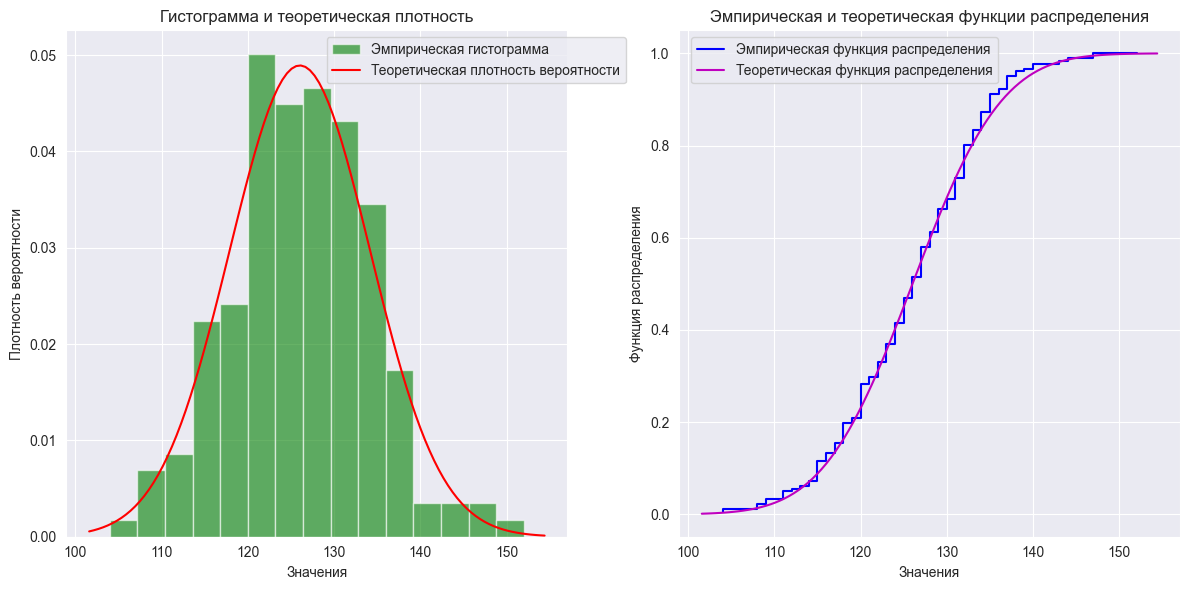

In [26]:
# Оценки параметров нормального распределения
mean_estimate = np.mean(data)
std_estimate = np.std(data, ddof=1)

# Первая фигура: гистограмма и теоретическая плотность вероятности
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Эмпирическая гистограмма
plt.hist(data, bins=15, density=True, alpha=0.6, color='g', label='Эмпирическая гистограмма')

# Теоретическая функция плотности вероятности
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = stats.norm.pdf(x, mean_estimate, std_estimate)
plt.plot(x, pdf, 'r-', label='Теоретическая плотность вероятности')

# Легенда
plt.legend(loc='upper right', bbox_to_anchor=(1.13, 1))
plt.title('Гистограмма и теоретическая плотность')
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.grid(True)

# Вторая фигура: ЭФР и теоретическая функция распределения
plt.subplot(1, 2, 2)

# Эмпирическая функция распределения (ЭФР)
sorted_data = np.sort(data)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
plt.step(sorted_data, ecdf, 'b-', label='Эмпирическая функция распределения')

# Теоретическая функция распределения
cdf = stats.norm.cdf(x, mean_estimate, std_estimate)
plt.plot(x, cdf, 'm-', label='Теоретическая функция распределения')

# Легенда
plt.legend(loc='upper right', bbox_to_anchor=(0.65, 1))
plt.title('Эмпирическая и теоретическая функции распределения')
plt.xlabel('Значения')
plt.ylabel('Функция распределения')
plt.grid(True)

# Показать первую фигуру
plt.tight_layout()
plt.show()


# 9. Проверить выполнение правила «трех сигма».

### Порядок выполнения:

1. **Проверка выполнения правила «трех сигма»:**
   Правило «трех сигма» утверждает, что для нормально распределённой случайной величины около 99.7% данных должны лежать в интервале от μ - 3σ до μ + 3σ, где μ — среднее значение, а σ — стандартное отклонение.
   Для проверки необходимо вычислить среднее и стандартное отклонение выборки, а затем проверить, сколько данных попадает в этот интервал. Если доля данных в интервале близка к 99.7%, правило выполнено.


In [27]:
# Оценки параметров нормального распределения
mean_estimate = np.mean(data)
std_estimate = np.std(data, ddof=1)

# Границы интервалов
lower_bound_1 = mean_estimate - 1 * std_estimate
upper_bound_1 = mean_estimate + 1 * std_estimate

lower_bound_2 = mean_estimate - 2 * std_estimate
upper_bound_2 = mean_estimate + 2 * std_estimate

lower_bound_3 = mean_estimate - 3 * std_estimate
upper_bound_3 = mean_estimate + 3 * std_estimate

# Подсчет значений в интервалах
values_in_range_1 = [x for x in data if lower_bound_1 <= x <= upper_bound_1]
values_in_range_2 = [x for x in data if lower_bound_2 <= x <= upper_bound_2]
values_in_range_3 = [x for x in data if lower_bound_3 <= x <= upper_bound_3]

# Процент значений в интервалах
percent_in_range_1 = len(values_in_range_1) / len(data) * 100
percent_in_range_2 = len(values_in_range_2) / len(data) * 100
percent_in_range_3 = len(values_in_range_3) / len(data) * 100

# Выводим результаты
print(f"Границы интервала по правилу 1 сигмы: ({lower_bound_1:.2f}, {upper_bound_1:.2f})")
print(f"Количество значений в интервале 1 сигма: {len(values_in_range_1)}")
print(f"Процент значений в интервале 1 сигма: {percent_in_range_1:.2f}%\n")

print(f"Границы интервала по правилу 2 сигмы: ({lower_bound_2:.2f}, {upper_bound_2:.2f})")
print(f"Количество значений в интервале 2 сигмы: {len(values_in_range_2)}")
print(f"Процент значений в интервале 2 сигмы: {percent_in_range_2:.2f}%\n")

print(f"Границы интервала по правилу 3 сигмы: ({lower_bound_3:.2f}, {upper_bound_3:.2f})")
print(f"Количество значений в интервале 3 сигмы: {len(values_in_range_3)}")
print(f"Процент значений в интервале 3 сигмы: {percent_in_range_3:.2f}%")

Границы интервала по правилу 1 сигмы: (117.87, 134.18)
Количество значений в интервале 1 сигма: 130
Процент значений в интервале 1 сигма: 71.82%

Границы интервала по правилу 2 сигмы: (109.72, 142.33)
Количество значений в интервале 2 сигмы: 171
Процент значений в интервале 2 сигмы: 94.48%

Границы интервала по правилу 3 сигмы: (101.57, 150.49)
Количество значений в интервале 3 сигмы: 180
Процент значений в интервале 3 сигмы: 99.45%


Т.к. только 99,45% поподают в три сигмы, то правило не выполняется, но в целом результат можно считать достаточно близким и приемлемым.

# 10. Применить критерий согласия Пирсона принять или опровергнуть выдвинутую гипотезу о распределении генеральной совокупности.

### Порядок выполнения:

1. **Применение критерия согласия Пирсона:**
   Критерий Пирсона используется для проверки гипотезы о соответствии наблюдаемых данных теоретическому распределению. Для этого необходимо:

   - Сформулировать нулевую гипотезу (H₀): данные следуют выбранному распределению (например, нормальному).
   - Разделить данные на интервалы и подсчитать наблюдаемые частоты.
   - Рассчитать ожидаемые частоты на основе теоретического распределения.
   - Использовать статистику χ² для вычисления отклонения между наблюдаемыми и ожидаемыми частотами:
     χ² = Σ ((Oᵢ - Eᵢ)² / Eᵢ)
     где Oᵢ — наблюдаемые частоты, а Eᵢ — ожидаемые частоты.

2. **Проверка гипотезы:**
   - Рассчитать значение χ² и сравнить его с критическим значением из таблицы распределения χ² для заданного уровня значимости.
   - Если рассчитанное значение χ² меньше критического, нулевая гипотеза принимается, и распределение данных соответствует предполагаемому.
   - Если значение χ² больше критического, гипотеза отвергается, и предполагаемое распределение не подходит для данных.


 Критерий согласия Пирсона (χ²-критерий) используется для проверки гипотез о соответствии распределения выборки предполагаемому распределению (например, нормальному). Этот критерий сравнивает наблюдаемые частоты с ожидаемыми частотами, которые рассчитываются на основе предполагаемого распределения.

In [28]:
# Параметры выборки
n = len(data)
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# Интервалы для хи-квадрат теста
num_bins = 10
bins = np.linspace(min(data), max(data), num_bins + 1)
observed_freq, _ = np.histogram(data, bins=bins)

# Теоретические частоты на основе нормального распределения
expected_freq = []
for i in range(num_bins):
    lower_bound = bins[i]
    upper_bound = bins[i + 1]
    prob = stats.norm.cdf(upper_bound, mean, std_dev) - stats.norm.cdf(lower_bound, mean, std_dev)
    expected_freq.append(prob * n)

# Выполнение теста хи-квадрат
chi_squared_statistic = sum((obs - exp) ** 2 / exp for obs, exp in zip(observed_freq, expected_freq))
critical_value = stats.chi2.ppf(0.95, df=num_bins - 3)  # df = k - 1 - 2 (т.к. 2 параметра оценены по выборке)
accept_null_hypothesis = chi_squared_statistic < critical_value

print(f"Результат теста: {chi_squared_statistic}")
print(f"Критическое значение: {critical_value}")
print(f"Итог: {"Подтверждено" if accept_null_hypothesis else "Не подтверждено"}")

Результат теста: 6.240278816711791
Критическое значение: 14.067140449340167
Итог: Подтверждено


In [29]:
# Создание таблицы с наблюдаемыми и ожидаемыми частотами
results_table = pd.DataFrame({
    'Интервал': [f'({bins[i]:.2f}, {bins[i + 1]:.2f})' for i in range(num_bins)],
    'Наблюдаемая частота': observed_freq,
    'Ожидаемая частота': expected_freq
})
results_table

,Интервал,Наблюдаемая частота,Ожидаемая частота
0,"(104.00, 108.80)",3,2.507829
1,"(108.80, 113.60)",7,8.403206
2,"(113.60, 118.40)",25,20.097738
3,"(118.40, 123.20)",31,34.318356
4,"(123.20, 128.00)",38,41.846654
5,"(128.00, 132.80)",40,36.440088
6,"(132.80, 137.60)",27,22.660107
7,"(137.60, 142.40)",5,10.060947
8,"(142.40, 147.20)",4,3.188567
9,"(147.20, 152.00)",1,0.721071


# 11. Найти доверительные интервалы для генеральной средней и генерального среднеквадратического отклонения по уровню надежности γ = 0,95.

### Порядок выполнения:

1. **Нахождение доверительного интервала для генеральной средней:**
   Для построения доверительного интервала для средней генеральной совокупности, используя уровень надежности γ = 0.95, необходимо:

   - Вычислить выборочное среднее x̄ и стандартное отклонение выборки s.
   - Для нормального распределения (или больших выборок) использовать t-распределение или нормальное распределение (в зависимости от объёма выборки).
   - Рассчитать границы интервала с использованием формулы:
     x̄ ± t(α/2) * (s / √n)
     где t(α/2) — критическое значение t-распределения для уровня значимости α = 1 - γ, n — размер выборки.

2. **Нахождение доверительного интервала для генерального среднеквадратического отклонения:**
   Для вычисления доверительного интервала для стандартного отклонения используется χ²-распределение. Формула для интервала:
     (√((n-1) * s² / χ²(α/2, n-1)), √((n-1) * s² / χ²(1-α/2, n-1)))
   где s² — выборочная дисперсия, χ²(α/2, n-1) и χ²(1-α/2, n-1) — критические значения χ²-распределения для уровня значимости α.


Доверительный интервал (ДИ) — это интервал, который с заданной вероятностью (уровень надежности) содержит истинное значение параметра генеральной совокупности. 

In [30]:
# Выборочное среднее и исправленная выборочная дисперсия
mean = np.mean(data)
std_dev = np.std(data, ddof=1)

# Уровень значимости
gamma = 0.95
alpha = 1 - gamma

# Доверительный интервал для генеральной средней
t_critical = stats.t.ppf(1 - alpha / 2, df=n - 1)
CI_mean = (mean - t_critical * (std_dev / np.sqrt(n)), mean + t_critical * (std_dev / np.sqrt(n)))

# Доверительный интервал для генерального среднеквадратического отклонения
chi2_critical_low = stats.chi2.ppf(alpha / 2, df=n - 1)
chi2_critical_high = stats.chi2.ppf(1 - alpha / 2, df=n - 1)
CI_std_dev = (np.sqrt((n - 1) * std_dev**2 / chi2_critical_high), np.sqrt((n - 1) * std_dev**2 / chi2_critical_low))

# Вывод результатов
print("Доверительный интервал для генеральной средней:", *CI_mean)
print("Доверительный интервал для генерального среднеквадратического отклонения:", *CI_std_dev)


Доверительный интервал для генеральной средней: 124.83173085171636 127.22351776706817
Доверительный интервал для генерального среднеквадратического отклонения: 7.391356409736207 9.092723196514504
